<a href="https://colab.research.google.com/github/patriciamg90/F25-MAT-1630/blob/main/Imputing_missing_values_(statistical).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Statistical imputation for missing values

"Missing values may occur for a number of reasons, such as malfunctioning measurement equipment, changes in experimental design during data collection, and collation of several similar but not identical datasets"

*Page 63, Data Mining: Practical Machine Learning Tools and Techniques, 2016.

Common statistics calculated include:

- The column mean value.
- The column median value.
- The column mode value.
- A constant value.

Data: Horse colic data set

Dataset description: https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.names

In [ ]:
import pandas as pd

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframeorg = pd.read_csv(url, header=None)
print(dataframeorg.head())

  0   1        2      3    4   5  6  7  8  9   ...     18    19 20    21 22  \
0  2   1   530101  38.50   66  28  3  3  ?  2  ...  45.00  8.40  ?     ?  2   
1  1   1   534817   39.2   88  20  ?  ?  4  1  ...     50    85  2     2  3   
2  2   1   530334  38.30   40  24  1  1  3  1  ...  33.00  6.70  ?     ?  1   
3  1   9  5290409  39.10  164  84  4  1  6  2  ...  48.00  7.20  3  5.30  2   
4  2   1   530255  37.30  104  35  ?  ?  6  2  ...  74.00  7.40  ?     ?  2   

  23     24 25 26 27  
0  2  11300  0  0  2  
1  2   2208  0  0  2  
2  2      0  0  0  1  
3  1   2208  0  0  1  
4  2   4300  0  0  2  

[5 rows x 28 columns]


In [ ]:
dataframeorg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       300 non-null    int64 
 2   2       300 non-null    int64 
 3   3       300 non-null    object
 4   4       300 non-null    object
 5   5       300 non-null    object
 6   6       300 non-null    object
 7   7       300 non-null    object
 8   8       300 non-null    object
 9   9       300 non-null    object
 10  10      300 non-null    object
 11  11      300 non-null    object
 12  12      300 non-null    object
 13  13      300 non-null    object
 14  14      300 non-null    object
 15  15      300 non-null    object
 16  16      300 non-null    object
 17  17      300 non-null    object
 18  18      300 non-null    object
 19  19      300 non-null    object
 20  20      300 non-null    object
 21  21      300 non-null    object
 22  22      300 non-null    ob

#### Marking missing values with a NaN (not a number) value in dataset using Python

In [ ]:
import pandas as pd

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = pd.read_csv(url, header=None, na_values='?')

In [ ]:
# summarize the first few rows

print(dataframe.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       299 non-null    float64
 1   1       300 non-null    int64  
 2   2       300 non-null    int64  
 3   3       240 non-null    float64
 4   4       276 non-null    float64
 5   5       242 non-null    float64
 6   6       244 non-null    float64
 7   7       231 non-null    float64
 8   8       253 non-null    float64
 9   9       268 non-null    float64
 10  10      245 non-null    float64
 11  11      256 non-null    float64
 12  12      244 non-null    float64
 13  13      196 non-null    float64
 14  14      194 non-null    float64
 15  15      53 non-null     float64
 16  16      198 non-null    float64
 17  17      182 non-null    float64
 18  18      271 non-null    float64
 19  19      267 non-null    float64
 20  20      135 non-null    float64
 21  21      102 non-null    float64
 22  22

#### Enumerate each column and report the number of rows with missing values for the column and percentage of missing values.

In [ ]:
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


/tmp/ipython-input-2258446459.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/tmp/ipython-input-2258446459.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/tmp/ipython-input-2258446459.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/tmp/ipython-input-2258446459.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/tmp/ipython-input-2258446459.py:6: FutureWarning: Calling i

### Statistical Imputation With SimpleImputer

The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation. The SimpleImputer is a data transform that is first configured based on the type of statistic to calculate for each column, e.g. mean.

In [ ]:
from sklearn.impute import SimpleImputer
# define imputer
imputer = SimpleImputer(strategy='mean')

Fitting the imputer to the dataset to compute the statistic on each column

In [ ]:
from numpy import isnan

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

print(data.shape)
# print total missing


print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

(300, 28)
Missing: 1605
Missing: 0


The transform is configured, fit, and performed and the resulting new dataset has no missing values, confirming it was performed as we expected. Each missing value was replaced with the mean value of its column.

#### SimpleImputer and Model Evaluation
It is a good practice to evaluate machine learning models on a dataset using k-fold cross-validation. We'll see more about the k-fold cross validation in the "resampling" lecture.

"we are using resampling to select tuning parameter values or to estimate performance, the imputation should be incorporated within the resampling."

— Page 42, Applied Predictive Modeling, 2013.

Modeling pipeline:
- Step 1. statistical imputation
- Step 2. the model

In this case we use the SimplerImputer with a "mean" strategy and a random forest classifier.

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.864 (0.055)


The pipeline is evaluated using three repeats of 10-fold cross-validation and reports the mean classification accuracy on the dataset as about 84%

### Experiment to test each statistical strategy.
Find out whcih is best for this dataset

>mean 0.863 (0.061)
>median 0.870 (0.053)
>most_frequent 0.871 (0.053)
>constant 0.879 (0.051)


/tmp/ipython-input-3181994895.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=strategies, showmeans=True)


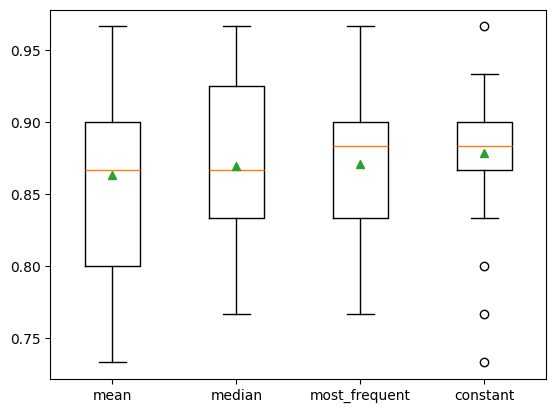

In [ ]:
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

### SimpleImputer Transform When Making a Prediction

In [ ]:
from numpy import nan
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

In [ ]:
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)

# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])


Predicted Class: 2


References

- https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/
- Bad Data Handbook, 2012.
- Data Mining: Practical Machine Learning Tools and Techniques, 2016.
- Applied Predictive Modeling, 2013.